# Explore Anime Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import nltk

## Load anime.csv

In [2]:
df = pd.read_csv('data/anime.csv')
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,ONA,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...
17559,48488,Higurashi no Naku Koro ni Sotsu,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
17560,48491,Yama no Susume: Next Summit,TV,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


## Drop ONA and Unknown type of anime

In [3]:
df.Type.unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Unknown'], dtype=object)

In [4]:
df = df[df.Type.isin(['TV', 'Movie', 'OVA', 'Special'])]
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17555,48471,Tsuki to Laika to Nosferatu,TV,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...
17559,48488,Higurashi no Naku Koro ni Sotsu,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
17560,48491,Yama no Susume: Next Summit,TV,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


## Drop Rows with Missing Value

In [5]:
df = df.dropna(axis=0)
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17555,48471,Tsuki to Laika to Nosferatu,TV,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...
17559,48488,Higurashi no Naku Koro ni Sotsu,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
17560,48491,Yama no Susume: Next Summit,TV,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


## Drop Rows with Unusable Synopsis

In [6]:
ban_words = ['no synopsis', 'anime', 'animation', 'animated', 'movie', 'cinema', 'film', 'screened', 
             'tv series', 'manga', 'novel', 'prequel', 'sequel', 'compilation', 'recap', 'ada'
             'summary', 'based on', 'season', 'half', 'commercial', 'episode', 'condensed',
             'ova', 'dvd', 'blu-ray', 'bd', 'spin-off', 'station ID', 'chapter', 'aired', 
             'continuation', 'advertisement', 'tv show', 'tv program', 'tv special', 'promotional',
             'graduation', 'safety', 'educational', 'retelling', 'remake', 'released']

In [7]:
for word in ban_words:
    print(word, df.Synopsis.str.contains(word, case=False).sum())

no synopsis 665
anime 935
animation 519
animated 315
movie 588
cinema 37
film 825
screened 67
tv series 193
manga 674
novel 201
prequel 36
sequel 116
compilation 66
recap 270
adasummary 0
based on 873
season 535
half 187
commercial 131
episode 1199
condensed 10
ova 476
dvd 667
blu-ray 332
bd 227
spin-off 31
station ID 11
chapter 66
aired 437
continuation 60
advertisement 18
tv show 12
tv program 9
tv special 53
promotional 34
graduation 57
safety 207
educational 229
retelling 40
remake 29
released 307


In [8]:
for word in ban_words:
    df = df[~df.Synopsis.str.contains(word, case=False)]

In [9]:
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17553,48466,Kyoukai Senki,TV,"Action, Mecha","In the year 2061 AD, Japan has lost its sovere..."
17554,48470,D_Cide Traumerei,TV,"Action, Adventure, Drama, Magic, Fantasy",The stage is Shibuya. When Ryuuhei Oda was in ...
17555,48471,Tsuki to Laika to Nosferatu,TV,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...


## Clean Synopsis for NLP

### To lower case

In [10]:
df['Synopsis'] = df.Synopsis.str.lower()
df.head()

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","in the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","vash the stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",it is the dark century and the people are suff...


### Remove Non-alphabetic Characters

In [11]:
def remove_nonalpha(text):
    result = [c if c.isalpha() else ' ' for c in text]
    return ''.join(result)

df['Synopsis'] = df.Synopsis.apply(remove_nonalpha)
df.head()

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",in the year humanity has colonized sever...
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space",another day another bounty such is the life o...
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",vash the stampede is the man with a ...
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",it is the dark century and the people are suff...


### Remove Non-english Words

In [12]:
english_words = nltk.corpus.words.words()

In [13]:
def remove_noneng(text):
    words = text.split()
    result = [w for w in words if w in english_words]
    return " ".join(result)

df['Synopsis'] = df.Synopsis.apply(remove_noneng)
df.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/home/dohun/anaconda3/envs/isd/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-97565bc1d804>", line 6, in <module>
    df['Synopsis'] = df.Synopsis.apply(remove_noneng)
  File "/home/dohun/anaconda3/envs/isd/lib/python3.7/site-packages/pandas/core/series.py", line 4138, in apply
    mapped = lib.map_infer(values, f, convert=convert_dtype)
  File "pandas/_libs/lib.pyx", line 2467, in pandas._libs.lib.map_infer
  File "<ipython-input-13-97565bc1d804>", line 3, in remove_noneng
    result = [w for w in words if w in english_words]
  File "<ipython-input-13-97565bc1d804>", line 3, in <listcomp>
    result = [w for w in words if w in english_words]
KeyboardInterrupt

During handling of the above exception, another exception occu

TypeError: object of type 'NoneType' has no len()

### Remove stopwords

In [23]:
!wget -nc -q https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt

f = open('stopwords-en.txt', 'r')
stopwords = f.read().splitlines()
f.close()

In [24]:
def remove_stopword(text):
    words = text.split()
    result = [w for w in words if w not in stopwords]
    return " ".join(result)

df['Synopsis'] = df.Synopsis.apply(remove_stopword)
df

,MAL_ID,Synopsis
0,1,humanity solar leaving uninhabitable surface p...
1,5,day bounty life unlucky crew bebop routine int...
2,6,stampede bounty head reason merciless villain ...
3,7,special telekinesis mind control robin craft u...
4,8,dark century people suffering rule devil manip...


### Short synopsis

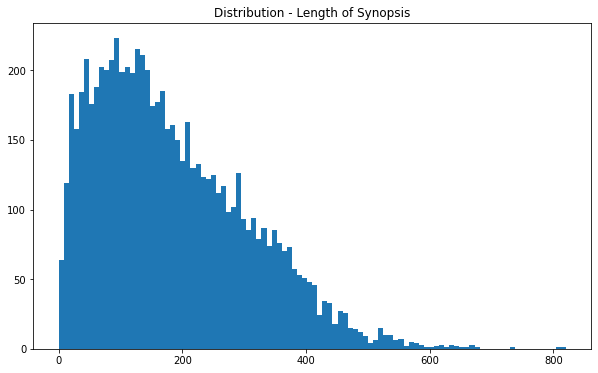

In [25]:
synlen = df.Synopsis.str.len()

plt.figure(figsize=(10, 6))
plt.hist(synlen, bins=100)
plt.title('Distribution - Length of Synopsis')
plt.show()

In [47]:
# short_syn = df.loc[synlen.nsmallest(300).index]
short_syn = df[synlen>100].sort_values(by='Synopsis', key=lambda x: x.str.len())

pd.merge(short_syn, df['MAL_ID', 'Genre'], on='MAL_ID')

,MAL_ID,Synopsis,Genre
0,20969,born prince clan position prince strange boy p...,"Drama, Historical, Supernatural"
1,3369,people luck money food resort gambling survive...,"Game, Historical, Shounen"
2,1236,planet dying queen powerless universe perish p...,"Adventure, Mecha, Sci-Fi, Shounen, Space"
3,1360,hot summer day finally courage reveal true cru...,Hentai
4,2801,candy pony girl lost associate cheer moment po...,"Slice of Life, Drama, Shoujo"
...,...,...,...
5029,4808,carefree youth assistant detective kuruma freq...,"Action, Sci-Fi, Adventure, Police, Super Power"
5030,5006,time castle lived king famous violent temper b...,"Kids, Adventure, Fantasy"
5031,2543,variant robin hood principal county cruel gree...,"Adventure, Historical, Romance"
5032,33670,set future yellow river planet realm car racin...,"Action, Adventure, Cars"


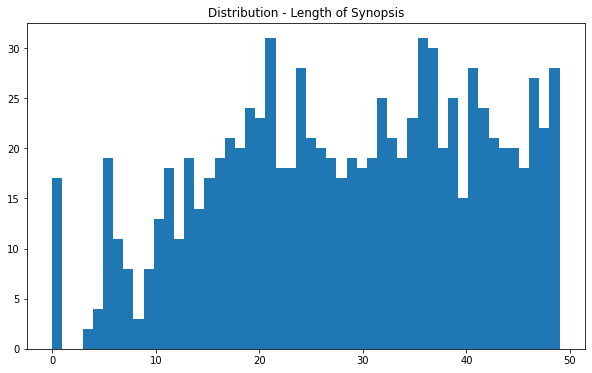

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(short_syn.Synopsis.str.len(), bins=50)
plt.title('Distribution - Length of Synopsis')
plt.show()

## Plot Distribution of Genre

In [ ]:
genre_list = list(set(df.Genre.str.split(', ').sum()))

genre_cnt = []
for genre in genre_list:
    cnt = df.Genre.str.contains(genre).sum()
    genre_cnt.append(cnt)

In [ ]:
sorted_genre_list = [x for _, x in sorted(zip(genre_cnt, genre_list))]
sorted_genre_cnt  = sorted(genre_cnt)

plt.figure(figsize=(10, 12))
plt.barh(sorted_genre_list, sorted_genre_cnt)
plt.title('Distribution of Genre')
plt.show()

## Split Data to Metadata, Genre, Synopsis

In [ ]:
metadata = df[['MAL_ID', 'Name', 'Type']].copy()
genre    = df[['MAL_ID', 'Genre']].copy()
synopsis = df[['MAL_ID', 'Synopsis']].copy()

del df

## Encode Genre to 0-1 Vector

In [ ]:
genre.head()

In [ ]:
genre_list.sort()

for gen in genre_list:
    genre[gen] = genre.Genre.str.contains(gen).astype(int)

genre_str = genre[['MAL_ID', 'Genre']]
genre = genre.drop('Genre', axis=1)

In [ ]:
genre.head()

## Save Cleaned Data

In [1]:
# ROOT_PATH   = os.getcwd()
# TARGET_PATH = ROOT_PATH + '/cleaned_data'

In [28]:
# file_path = TARGET_PATH + '/synopsis.csv'
# synopsis.to_csv(file_path, index=False)